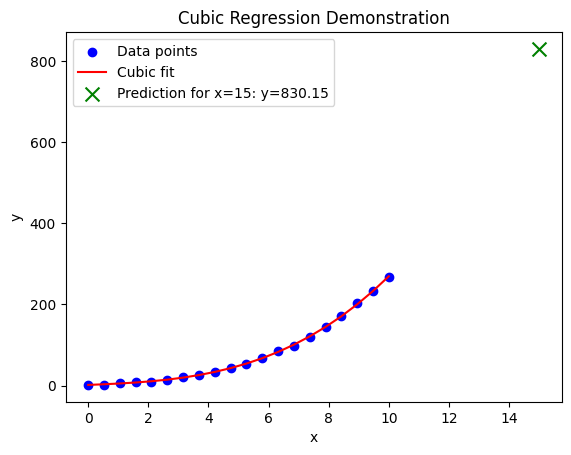

Prediction for x=15: 830.15
Sum of Squared Errors (SSE): 39.56
Model Coefficients: [0.         2.94399819 0.18157799 0.22034314]
Coefficient for x^3: 0.22
Coefficient for x^2: 0.18
Coefficient for x: 2.94
Intercept (constant term): 1.48
Note: coefs[0] is always 0 because PolynomialFeatures adds an implicit bias term.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Ensure reproducibility
np.random.seed(42)

# Generate pseudo-random data points close to a cubic function y = 0.2x^3 + 0.5x^2 + 2x + 1
x = np.linspace(0, 10, 20)  # 20 evenly spaced points from 0 to 10
y = 0.2 * x**3 + 0.5 * x**2 + 2 * x + 1 + np.random.normal(scale=2, size=x.shape)  # Adding noise

# Reshape x for sklearn (expects 2D input)
x = x.reshape(-1, 1)

# Create polynomial regression model (cubic)
poly_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_model.fit(x, y)

# Extract model parameters
coefs = poly_model.named_steps['linearregression'].coef_
intercept = poly_model.named_steps['linearregression'].intercept_

# Predict y for x=15
x_sample = np.array([[15]])
y_pred_sample = poly_model.predict(x_sample)

# Compute predicted values for all x
y_pred = poly_model.predict(x)

# Compute SSE
sse = np.sum((y - y_pred) ** 2)

# Plot data points and regression curve
plt.scatter(x, y, color='blue', label='Data points')
sorted_x = np.sort(x, axis=0)  # Ensure x values are sorted for smooth curve
plt.plot(sorted_x, poly_model.predict(sorted_x), color='red', label='Cubic fit')
plt.scatter(x_sample, y_pred_sample, color='green', label=f'Prediction for x=15: y={y_pred_sample[0]:.2f}', marker='x', s=100)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Cubic Regression Demonstration')
plt.show()

# Print results
print(f"Prediction for x=15: {y_pred_sample[0]:.2f}")
print(f"Sum of Squared Errors (SSE): {sse:.2f}")
print(f"Model Coefficients: {coefs}")
print(f"Coefficient for x^3: {coefs[3]:.2f}")
print(f"Coefficient for x^2: {coefs[2]:.2f}")
print(f"Coefficient for x: {coefs[1]:.2f}")
print(f"Intercept (constant term): {intercept:.2f}")
print("Note: coefs[0] is always 0 because PolynomialFeatures adds an implicit bias term.")